In [16]:
%matplotlib inline
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

In [17]:
imdb_df = pd.read_csv('projectData.csv')
imdb_df = imdb_df.set_index('tconst')

imdb_df = imdb_df.drop('numVotes', axis=1)
imdb_df = imdb_df.drop('writers', axis=1)

In [18]:
genres_df = imdb_df['genres'].str.get_dummies(sep=',')
genres_df = genres_df.add_prefix('genre_')
imdb_df = pd.concat([imdb_df, genres_df], axis=1)
imdb_df = imdb_df.drop('genres', axis=1)


directors_df = imdb_df['directors'].str.get_dummies(sep=',')
directors_df = directors_df.add_prefix('dir_')
imdb_df = pd.concat([imdb_df, directors_df], axis=1)
imdb_df = imdb_df.drop('directors', axis=1)


actor_df = imdb_df['actor'].str.get_dummies(sep=',')
actor_df = actor_df.add_prefix('actor_')
imdb_df = pd.concat([imdb_df, actor_df], axis=1)
imdb_df = imdb_df.drop('actor', axis=1)

In [19]:
# define the bins
bins = [0, 2.4, 5.0, 7.4, 10]

# define the bin labels
labels = ['Terrible', 'Poor', 'Average', 'Excellent']

# create a new column with the bin labels
imdb_df['binRating'] = pd.cut(imdb_df['averageRating'], bins=bins, labels=labels, include_lowest=True)

imdb_df = imdb_df.drop('averageRating', axis=1)
imdb_df = pd.get_dummies(imdb_df, columns=['binRating'], prefix='bin')
imdb_df.head()

,runtimeMinutes,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,...,actor_nm9500254,actor_nm9503133,actor_nm9576872,actor_nm9858131,actor_nm9862858,actor_nm9877392,bin_Terrible,bin_Poor,bin_Average,bin_Excellent
tconst,,,,,,,,,,,,,,,,,,,,,
tt0035423,118,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
tt0118589,104,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
tt0118694,98,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
tt0120202,105,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
tt0120630,84,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
X = imdb_df.drop(['bin_Average', 'bin_Excellent', 'bin_Poor', 'bin_Terrible'], axis=1)
y = imdb_df[['bin_Excellent']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=102)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define the model
nb = MultinomialNB()

# Define the grid of hyperparameters to search
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
              'fit_prior': [True, False]}

# Perform grid search cross-validation to find the optimal hyperparameters
grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the optimal hyperparameters
print(grid_search.best_params_)

/Users/wileybattles/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/wileybattles/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/wileybattles/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/wileybattles/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed w

/Users/wileybattles/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/wileybattles/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/wileybattles/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/wileybattles/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed w

{'alpha': 0.5, 'fit_prior': True}


/Users/wileybattles/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/wileybattles/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/wileybattles/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
# Train the Naive Bayes classifier
imdb_nb = MultinomialNB(alpha=0.5, fit_prior=True)
imdb_nb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = imdb_nb.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

/Users/wileybattles/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8383045525902669


In [23]:
# predict probabilities
predProb_train = imdb_nb.predict_proba(X_train)
predProb_test = imdb_nb.predict_proba(X_test)

# predict class membership
y_test_pred = imdb_nb.predict(X_test)
y_train_pred = imdb_nb.predict(X_train)

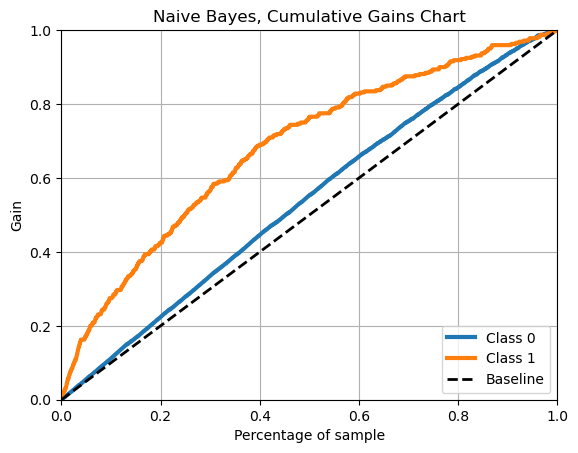

In [24]:
import scikitplot as skplt
from scikitplot.helpers import cumulative_gain_curve

skplt.metrics.plot_cumulative_gain(y_test, predProb_test)
plt.title('Naive Bayes, Cumulative Gains Chart')
plt.show()